<a href="https://colab.research.google.com/github/hydroweaver/deep-learning/blob/master/dogs_vs_cats_2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-06-04 16:21:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   121MB/s    in 0.5s    

2019-06-04 16:21:55 (121 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
import os, shutil
import PIL

base_dir = '/tmp/cats_and_dogs_filtered/'

test_dir = os.path.join(base_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(test_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 28s 278ms/step - loss: 0.6886 - acc: 0.5312 - val_loss: 0.7100 - val_acc: 0.5082
Epoch 2/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6752 - acc: 0.5753 - val_loss: 0.6526 - val_acc: 0.6186
Epoch 3/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6598 - acc: 0.6141 - val_loss: 0.6311 - val_acc: 0.6478
Epoch 4/100
100/100 [==============================] - 25s 250ms/step - loss: 0.6551 - acc: 0.6141 - val_loss: 0.6387 - val_acc: 0.6057
Epoch 5/100
100/100 [==============================] - 25s 250ms/step - loss: 0.6312 - acc: 0.6306 - val_loss: 0.5994 - val_acc: 0.6631
Epoch 6/100
100/100 [==============================] - 26s 255ms/step - loss: 0.6226 - acc: 0.6528 - val_loss: 0.6324 - val_acc: 0.6469
Epoch 7/100
100/100 [==============================] - 25s 251ms/step - loss: 0.6152 - acc: 0.6613 -

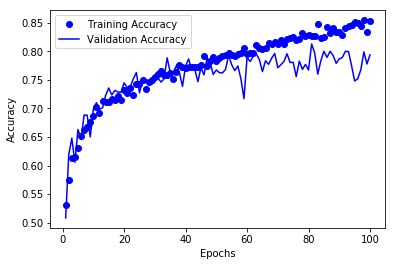

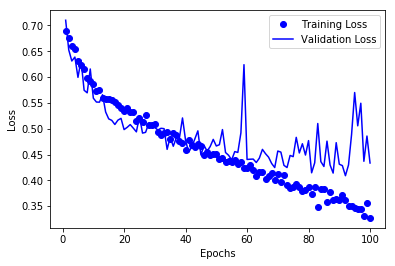

<Figure size 432x288 with 0 Axes>

In [8]:
#data augmentation step - remixing images - full run on small test data

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt

train_dir = '/tmp/cats_and_dogs_filtered/train/'
test_dir = '/tmp/cats_and_dogs_filtered/validation/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size = 32,
                class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(150, 150),
                batch_size = 32,
                class_mode='binary')

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 3))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 3))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs = 100,
                              validation_data = test_generator,
                              validation_steps = 50)

save_dir = r'/tmp/cats_and_dogs_filtered/'
model.save('{}\cats_and_dogs_small_2.h5'.format(save_dir))

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()